In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
# Optional additional libraries for processing
#import datetime as dtm
#import glob

In [2]:
# Combine multiple inputs into a single file (only use if know all variables have same shape)
def combine_nc(model_subdir, variables):
    '''
    ** USE WITH CAUTION **
    For example: subdir = "/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/"
    and variables ['uas', 'vas']
    '''
    subdir = "/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/"
    files = [glob.glob(topdir + variable + '/gn/latest/*.nc') for variable in variables]
    files = files[0] + files[1]
    listoffiles = [j for i in files for j in i]
    ds = xr.open_mfdataset(listoffiles)
    return ds

# Set base directory for CMIP6 climate data
base_dir = "/badc/cmip6/data/CMIP6/"

In [3]:
# Data does not have equally-sized lat-lon variables (possibly due to use of a tripolar grid). We interpolate to provide a uniform 1 deg grid
def process_winds(u,v, wind=True):
    dsu = xr.open_dataset(u)
    dsv = xr.open_dataset(v)
    dsu_interp = dsu.interp(lat=np.arange(-89.5,90,1.0), kwargs={"fill_value": "extrapolate"}).interp(lon=np.arange(0,360,1.0), kwargs={"fill_value": "extrapolate"})
    dsv_interp = dsv.interp(lat=np.arange(-89.5,90,1.0), kwargs={"fill_value": "extrapolate"}).interp(lon=np.arange(0,360,1.0), kwargs={"fill_value": "extrapolate"})
    dsu_interp = dsu_interp.drop(['lat_bnds','lon_bnds','time_bnds'])
    dsv_interp = dsv_interp.drop(['lat_bnds','lon_bnds','time_bnds'])
    # Combine variables into single netcdf file and add wind magnitude
    ds = xr.merge([dsu_interp,dsv_interp])
    if wind==True:
        ds['wind'] = np.sqrt((ds.uas)**2 + (ds.vas)**2)
    # Redefine longitudes to allow easier manipulation of data across prime meridian
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds = ds.sortby(ds.lon)
    return ds

In [4]:
# Met Office HadGEM3_GC31_LL Datasets
ds_HadGEM_hist_GHG = process_winds((base_dir + "DAMIP/MOHC/HadGEM3-GC31-LL/hist-GHG/r1i1p1f3/Amon/uas/gn/latest/uas_Amon_HadGEM3-GC31-LL_hist-GHG_r1i1p1f3_gn_195001-202012.nc"),
                                   (base_dir + "DAMIP/MOHC/HadGEM3-GC31-LL/hist-GHG/r1i1p1f3/Amon/vas/gn/latest/vas_Amon_HadGEM3-GC31-LL_hist-GHG_r1i1p1f3_gn_195001-202012.nc"))
ds_HadGEM_ssp245_GHG = process_winds((base_dir + "DAMIP/MOHC/HadGEM3-GC31-LL/ssp245-GHG/r1i1p1f3/Amon/uas/gn/latest/uas_Amon_HadGEM3-GC31-LL_ssp245-GHG_r1i1p1f3_gn_205001-210012.nc"),
                                   (base_dir + "DAMIP/MOHC/HadGEM3-GC31-LL/ssp245-GHG/r1i1p1f3/Amon/vas/gn/latest/vas_Amon_HadGEM3-GC31-LL_ssp245-GHG_r1i1p1f3_gn_205001-210012.nc"))

ds_HadGEM_cont = process_winds((base_dir + "CMIP/MOHC/HadGEM3-GC31-LL/piControl/r1i1p1f1/Amon/uas/gn/latest/uas_Amon_HadGEM3-GC31-LL_piControl_r1i1p1f1_gn_195001-204912.nc"),
                                (base_dir + "CMIP/MOHC/HadGEM3-GC31-LL/piControl/r1i1p1f1/Amon/vas/gn/latest/vas_Amon_HadGEM3-GC31-LL_piControl_r1i1p1f1_gn_195001-204912.nc"))
ds_HadGEM_hist = process_winds((base_dir + "CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/Amon/uas/gn/latest/uas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc"),
                                (base_dir + "CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/Amon/vas/gn/latest/vas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc"))

ds_HadGEM_ssp245 = process_winds((base_dir + "ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp245/r1i1p1f3/Amon/uas/gn/latest/uas_Amon_HadGEM3-GC31-LL_ssp245_r1i1p1f3_gn_205001-210012.nc"),
                                   (base_dir + "ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp245/r1i1p1f3/Amon/vas/gn/latest/vas_Amon_HadGEM3-GC31-LL_ssp245_r1i1p1f3_gn_205001-210012.nc"))
ds_HadGEM_ssp585 = process_winds((base_dir + "ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp585/r1i1p1f3/Amon/uas/gn/latest/uas_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc"),
                                   (base_dir + "ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp585/r1i1p1f3/Amon/vas/gn/latest/vas_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc"))

#dsu = xr.open_mfdataset("/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/uas/gn/latest/*.nc")
#dsv = xr.open_mfdataset("/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/vas/gn/latest/*.nc")
#dsu = xr.open_mfdataset("/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/uas/gn/latest/uas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_196001-204912.nc")
#dsv = xr.open_mfdataset("/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/vas/gn/latest/vas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_196001-204912.nc")

In [5]:
# Current sea ice extent
#ds_HadGEM_hist_si = xr.open_dataset(base_dir + "CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/SImon/siconc/gn/latest/siconc_SImon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc")
#ds_HadGEM_hist_si = xr.open_dataset("/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_siconc_SImon_HadGEM3-GC31-LL_historical_r1i1p1f3_195001-201412_yearmonths.nc")
#ds_HadGEM_hist_si.sel(time=slice('1960','2019'))
#ds_HadGEM_hist_si
#ds_HadGEM_hist_si.sel(record=45)
#so_HadGEM_hist_si = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_hist_si, 1960, 2019), months, bounds)

In [6]:

def month_avg_timeframe(dataset, ystart, yfin):
    ds = dataset.sel(time=slice(str(ystart),str(yfin)))
    ds = ds.groupby('time.month').mean('time')
    return ds

def sel_southern_ocean(dataset, months, extent):
    ds = dataset.sel(month=months,
                     lon=slice(extent[0],extent[1]),
                     lat=slice(extent[2],extent[3])).mean(dim='month')
    return ds
    
minlon = -90
maxlon = 170
minlat = -85
maxlat = 0    
bounds = [minlon, maxlon, minlat, maxlat]
months = [11,12,1,2,3,4]

In [7]:
so_HadGEM_cont       = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_cont, 1960, 2019), months, bounds)
so_HadGEM_hist       = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_hist, 1960, 2019), months, bounds)
so_HadGEM_hist_GHG   = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_hist_GHG, 1960, 2019), months, bounds)
so_HadGEM_ssp245_GHG = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_ssp245_GHG, 2080, 2099), months, bounds)
so_HadGEM_ssp245     = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_ssp245, 2080, 2099), months, bounds)
so_HadGEM_ssp585     = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_ssp585, 2080, 2099), months, bounds)

NameError: name 'so_HadGEM_hist_tau' is not defined

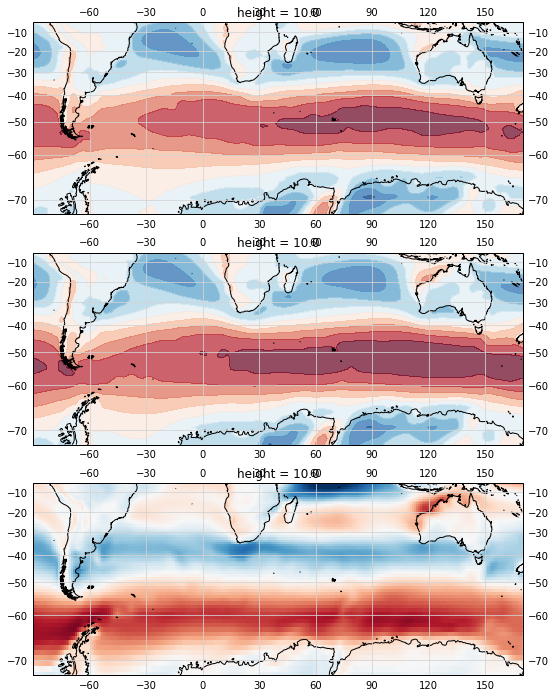

In [8]:
fig = plt.figure(figsize=(10,12))
gs = fig.add_gridspec(3, 1)

projection=ccrs.Mercator(central_longitude=0.0, min_latitude=-72.5, max_latitude=-5.0)

ax1 = fig.add_subplot(gs[0], projection=projection)
ax2 = fig.add_subplot(gs[1], projection=projection)
ax3 = fig.add_subplot(gs[2], projection=projection)

for ax in [ax1,ax2,ax3]:
    ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='k')
    ax.add_feature(cf.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='white'), zorder=0)
    gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    
cont_kwarg = dict(x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-8, vmax=8, levels=9, alpha=0.7, zorder=1)
mesh_kwarg = dict(x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', center=0, vmax=3)
quiv_kwarg = dict(transform=ccrs.PlateCarree(), pivot='middle', color='k', alpha=0.8, scale=50, zorder=-1)

p1 = so_HadGEM_hist.uas.plot.contourf(ax=ax1, **cont_kwarg)
p2 = so_HadGEM_ssp585.uas.plot.contourf(ax=ax2, **cont_kwarg)
p3 = (so_HadGEM_ssp585-so_HadGEM_hist).uas.plot.pcolormesh(ax=ax3, **mesh_kwarg)
q = ax1.quiver(so_HadGEM_hist_tau.lon[::5], so_HadGEM_hist_tau.lat[::5],
           so_HadGEM_hist_tau.uek.values[::5,::5], so_HadGEM_hist_tau.vek.values[::5,::5], **quiv_kwarg)
ax2.quiver(so_HadGEM_ssp585_tau.lon[::5], so_HadGEM_ssp585_tau.lat[::5],
           so_HadGEM_ssp585_tau.uek.values[::5,::5], so_HadGEM_ssp585_tau.vek.values[::5,::5], **quiv_kwarg)
#qk = ax1.quiverkey(q, 0.1, 0.9, 10, 'velocity (30 m s$^{-1}$)', labelpos='E', transform=ccrs.PlateCarree(), zorder=3,
#                  fontproperties={'weight': 'bold'})
#qk.text.set_backgroundcolor('w')

ax1.set_title('Historical (1960-2014)')
ax2.set_title('SSP585 (2080-2099)')
ax3.set_title('Change')

ax_cb = plt.axes([0.92, 0.5, 0.015, 0.25])
ax_cb2 = plt.axes([0.92, 0.13, 0.015, 0.2])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb2 = plt.colorbar(p3,cax=ax_cb2, orientation='vertical', extend='both')
cb.ax.set_ylabel(r'Average Zonal Wind (ms$^{-1})$')
cb2.ax.set_ylabel(r'Zonal Wind Change (ms$^{-1})$')
#ax.set_suptitle('Southern Ocean Surface Wind: November-April')
plt.savefig('southern_ocean_zonal_change.png')
plt.show()

In [ ]:
cont_kwargs = dict(x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-8, vmax=8, levels=9)

fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(1, 1)

projection=ccrs.Mercator(central_longitude=0.0, min_latitude=-72.5, max_latitude=-0.0)

ax1 = fig.add_subplot(gs[0], projection=projection)

for ax in [ax1]:
    ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='k')
    gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

p = (so_HadGEM_ssp245-so_HadGEM_ssp245_GHG).uas.plot.pcolormesh(ax=ax, **mesh_kwarg)

ax1.set_title('ScenarioMIP SSP245 - DMIP SSP245-GHG (2080-2099)')

ax_cb = plt.axes([0.95, 0.38, 0.015, 0.25])
cb = plt.colorbar(p,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_ylabel(r'Average Zonal Wind (ms$^{-1})$')
#ax.set_suptitle('Southern Ocean Surface Wind: November-April')
#plt.savefig('southern_ocean_zonal_change.png')
plt.show()

### Calculating change in Ekman wind transport

The Ekman wind transport affects the flow of ice from the continental ice shelf, which is derived using the formula 
$$ \boldsymbol{U}_\textrm{ek} = -\frac{1}{\rho_0 f} \hat{\boldsymbol{k}}\times\boldsymbol{\tau}$$
whilst the vertical Ekman pumping is calculated using
$$w_p \approx \frac{1}{\rho_0} \left(\nabla_z \times\frac{\boldsymbol{\tau}}{f}\right)$$

In [89]:
import windspharm
from windspharm.xarray import VectorWind

def ekman_transport(dataset):
    omega = 7.2921e-5
    rho0 = 1030
    f = 2*omega*np.sin(np.deg2rad(dataset.lat))
    
    dataset['uek'] = dataset.tauv / (rho0*f).where(abs(dataset.lat) > 5)
    dataset['vek'] = -dataset.tauu / (rho0*f).where(abs(dataset.lat) > 5) 
    return dataset

def ekman_pumping(dataset):
    omega = 7.2921e-5
    rho0 = 1030
    f = 2*omega*np.sin(np.deg2rad(dataset.lat))
    
    w = VectorWind(dataset.tauu, dataset.tauv)
    curltau = w.vorticity()
    
    dataset['wek'] = curltau/(rho0*f)*(86400*365.25)#.where(abs(dataset.lat) > 5)
    return dataset

In [166]:
ds_HadGEM_hist_tau = process_winds((base_dir + "CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/Amon/tauu/gn/latest/tauu_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc"),
                                   (base_dir + "CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/Amon/tauv/gn/latest/tauv_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc"),
                                    wind=False)
ds_HadGEM_ssp585_tau = process_winds((base_dir + "ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp585/r1i1p1f3/Amon/tauu/gn/latest/tauu_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc"),
                                   (base_dir + "ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp585/r1i1p1f3/Amon/tauv/gn/latest/tauv_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc"),
                                    wind=False)

In [167]:
so_HadGEM_hist_tau = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_hist_tau, 1960, 2019), months, bounds)
so_HadGEM_ssp585_tau = sel_southern_ocean(month_avg_timeframe(ds_HadGEM_ssp585_tau, 2080, 2099), months, bounds)

so_HadGEM_hist_tau = ekman_transport(so_HadGEM_cont_tau)
so_HadGEM_ssp585_tau = ekman_transport(so_HadGEM_ssp585_tau)


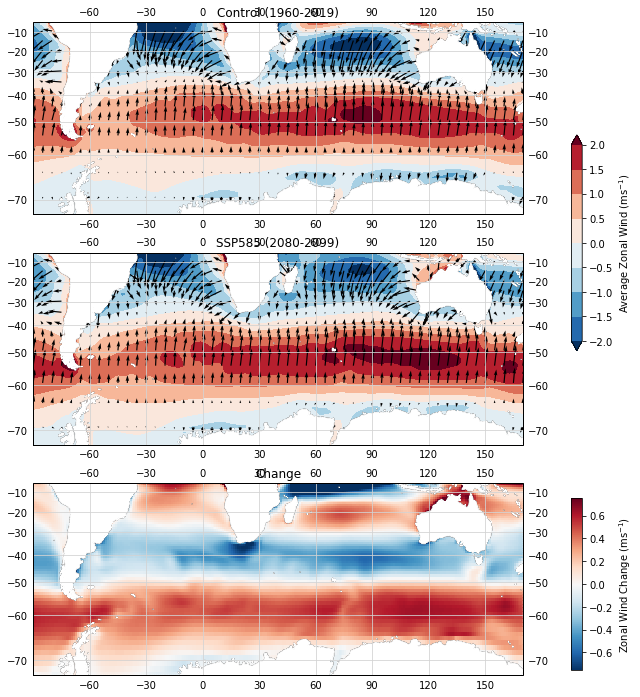

In [199]:
fig = plt.figure(figsize=(10,12))
gs = fig.add_gridspec(3, 1)

projection=ccrs.Mercator(central_longitude=0.0, min_latitude=-72.5, max_latitude=-5.0)

ax1 = fig.add_subplot(gs[0], projection=projection)
ax2 = fig.add_subplot(gs[1], projection=projection)
ax3 = fig.add_subplot(gs[2], projection=projection)

for ax in [ax1,ax2,ax3]:
    ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='k')
    ax.add_feature(cf.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='white'))
    gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    
cont_kwarg = dict(x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-2, vmax=2, levels=9)

p1 = so_HadGEM_hist_tau.vek.plot.contourf(ax=ax1, **cont_kwarg)
p2 = so_HadGEM_ssp585_tau.vek.plot.contourf(ax=ax2, **cont_kwarg)
p3 = (so_HadGEM_ssp585_tau-so_HadGEM_hist_tau).vek.plot.pcolormesh(ax=ax3, x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', center=0, robust=True)
ax1.quiver(so_HadGEM_hist_tau.lon[::5], so_HadGEM_hist_tau.lat[::5], so_HadGEM_hist_tau.uek.values[::5,::5], so_HadGEM_hist_tau.vek.values[::5,::5], transform=ccrs.PlateCarree())
ax2.quiver(so_HadGEM_ssp585_tau.lon[::5], so_HadGEM_ssp585_tau.lat[::5], so_HadGEM_ssp585_tau.uek.values[::5,::5], so_HadGEM_ssp585_tau.vek.values[::5,::5], transform=ccrs.PlateCarree())

ax1.set_title('Control (1960-2019)')
ax2.set_title('SSP585 (2080-2099)')
ax3.set_title('Change')

ax_cb = plt.axes([0.92, 0.5, 0.015, 0.25])
ax_cb2 = plt.axes([0.92, 0.13, 0.015, 0.2])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb2 = plt.colorbar(p3,cax=ax_cb2, orientation='vertical')
cb.ax.set_ylabel(r'Average Zonal Wind (ms$^{-1})$')
cb2.ax.set_ylabel(r'Zonal Wind Change (ms$^{-1})$')
#ax.set_suptitle('Southern Ocean Surface Wind: November-April')
#plt.savefig('southern_ocean_zonal_change.png')
plt.show()

In [74]:
curltau=ekman_pumping(ds_HadGEM_ssp585_tau)
curltau.wek

<xarray.DataArray 'wek' (time: 612, lat: 180, lon: 360)>
array([[[-23.23365 , -23.233662, ..., -23.233653, -23.233656],
        [ -1.304881,  -1.360135, ...,  -1.242638,  -1.265583],
        ...,
        [ 27.917043,  28.163033, ...,  27.434146,  27.674103],
        [ 75.837849,  75.837849, ...,  75.837844,  75.837844]],

       [[-24.363393, -24.3634  , ..., -24.363384, -24.363385],
        [ 24.794617,  24.147283, ...,  26.020937,  25.420195],
        ...,
        [-13.271037, -12.870702, ..., -14.014471, -13.652252],
        [-23.307529, -23.307524, ..., -23.307532, -23.307533]],

       ...,

       [[-37.284056, -37.284053, ..., -37.284044, -37.284056],
        [ 17.334003,  17.034867, ...,  17.789943,  17.586375],
        ...,
        [ 21.230066,  21.728618, ...,  20.289165,  20.750247],
        [ 72.203652,  72.203646, ...,  72.20364 ,  72.203652]],

       [[ -7.872744,  -7.872744, ...,  -7.87274 ,  -7.872737],
        [  2.519704,   2.914116, ...,   1.667763,   2.103875],
   

(-90, -20)

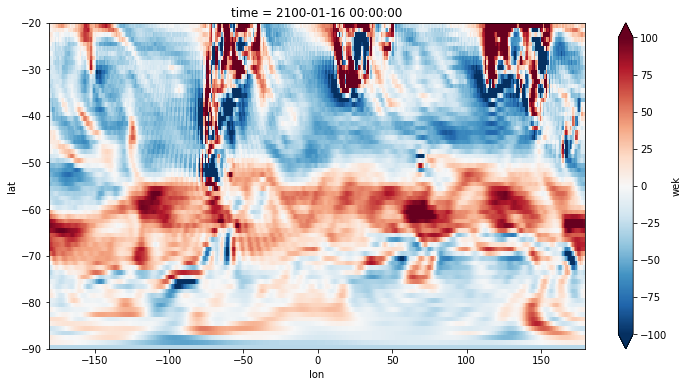

In [86]:
plt.subplots(figsize=(12,6))
curltau.isel(time=600).wek.plot(vmax=100)
plt.ylim(-90,-20)

In [70]:
curltau.wek * ((86400*365.25))

<xarray.DataArray 'wek' (time: 612, lat: 180, lon: 360)>
array([[[  3.489962,   3.489964, ...,   3.489963,   3.489963],
        [  0.195949,   0.204246, ...,   0.186602,   0.190047],
        ...,
        [  4.192185,   4.229124, ...,   4.11967 ,   4.155704],
        [ 11.39172 ,  11.39172 , ...,  11.391719,  11.391719]],

       [[  3.659663,   3.659664, ...,   3.659662,   3.659662],
        [ -3.723303,  -3.626096, ...,  -3.907454,  -3.817244],
        ...,
        [ -1.992856,  -1.932739, ...,  -2.104494,  -2.050101],
        [ -3.50106 ,  -3.501059, ...,  -3.50106 ,  -3.50106 ]],

       ...,

       [[  5.600495,   5.600495, ...,   5.600493,   5.600495],
        [ -2.602974,  -2.558054, ...,  -2.671441,  -2.640872],
        ...,
        [  3.18803 ,   3.262895, ...,   3.046738,   3.115977],
        [ 10.845821,  10.845821, ...,  10.84582 ,  10.845821]],

       [[  1.182577,   1.182577, ...,   1.182576,   1.182576],
        [ -0.378373,  -0.437601, ...,  -0.250441,  -0.31593 ],
   

In [155]:
ds_HadGEM_ssp585_tau

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 612)
Coordinates:
  * time     (time) object 2050-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
Data variables:
    tauu     (time, lat, lon) float64 -0.006573 -0.006922 ... 0.1022 0.1019
    tauv     (time, lat, lon) float64 0.01538 0.01523 ... -0.01744 -0.01922

In [33]:
curltau

<xarray.DataArray 'vorticity' (time: 612, lat: 180, lon: 360)>
array([[[ 3.609818e-07,  3.609818e-07, ...,  3.609818e-07,  3.609818e-07],
        [ 1.328423e-07,  1.340129e-07, ...,  1.305445e-07,  1.316863e-07],
        ...,
        [ 6.209234e-09,  6.472156e-09, ...,  5.913051e-09,  6.022233e-09],
        [ 1.105902e-07,  1.105903e-07, ...,  1.105902e-07,  1.105903e-07]],

       [[-1.109419e-07, -1.109419e-07, ..., -1.109419e-07, -1.109419e-07],
        [-6.314978e-08, -6.124480e-08, ..., -6.668739e-08, -6.496379e-08],
        ...,
        [-1.179844e-07, -1.149040e-07, ..., -1.238198e-07, -1.209611e-07],
        [ 1.159677e-07,  1.159678e-07, ...,  1.159677e-07,  1.159677e-07]],

       ...,

       [[ 3.436834e-07,  3.436833e-07, ...,  3.436833e-07,  3.436834e-07],
        [ 1.010226e-07,  1.033949e-07, ...,  9.654531e-08,  9.873936e-08],
        ...,
        [-8.248328e-08, -8.105985e-08, ..., -8.465285e-08, -8.368418e-08],
        [ 1.774690e-07,  1.774690e-07, ...,  1.774689e-0

In [ ]:
gg = 1